<p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold"><br>
Projet 6 :<br><br>
Catégorisez automatiquement des questions<br><br>
</p><br>

* **Data Source / Data Source :** 
    - Data : https://data.stackexchange.com/stackoverflow/query/edit/1086274
    - Source : https://github.com/EricJacquesPro/TextCategorization
* **Description / Description : ** Projet 6 de la formation Data Scientist Proposée par OpenClassroom
    - Analyse
    - Entrainement
* **Auteur / Author : ** Eric JACQUES 
* **Date : ** 06/08/2019 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
I - Data</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
I.1 - Source</p>

Revoir les explications

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
I.2 - Preparation des données</p>

In [1]:
import sys
import os
sys.path.insert(0, './Python')

try:
    from TagText import TagText
except Exception, e:
    print 'Import failed:', e


./Python\TagText.py:1: SyntaxWarning: import * only allowed at module level
  class TagText:


In [2]:
tagText = TagText()
print(tagText.urlDirectory)
print(tagText.fileName)
data_question = tagText.read_source()
data_question.head()

Data/
QuestionVsTags.csv


,body,title,tags,SelectedTags,Name
0,<p>Here is a piece of C++ code that shows some...,Why is processing a sorted array faster than p...,<java><c++><performance><optimization><branch-...,"java,c++,performance,optimization,",Question
1,<p>I accidentally committed the wrong files to...,How do I undo the most recent local commits in...,<git><version-control><git-commit><undo>,"git,version-control,git-commit,",Question
2,<p>I want to delete a branch both locally and ...,How do I delete a Git branch locally and remot...,<git><git-branch><git-remote>,"git,git-branch,",Question
3,<blockquote>\n <p><strong>Moderator Note:</st...,What is the difference between 'git pull' and ...,<git><git-pull><git-fetch>,"git,",Question
4,"<p>I've been messing around with <a href=""http...",What is the correct JSON content type?,<json><http-headers><content-type>,"json,http-headers,content-type,",Question


In [3]:
import numpy as np
import nltk
import pandas as pd
import re

from bs4 import BeautifulSoup

def preprocessing(text):
    clean_data = []
    for x in (text[:][0]):
        clean_data =  BeautifulSoup(x, 'html.parser').get_text()
        clean_data = clean_data.lower()#to lower
        clean_data = re.sub(r'[^\w\s]', '', clean_data) # remove punctuation
        #clean_data = nltk.clean_html(clean_data)=>NotImplementedError: To remove HTML markup, use BeautifulSoup's get_text() function
    return clean_data


def preprocessingdf(text):
    #print(text)
    #clean_data = []
    clean_data = text
    clean_data = clean_data.lower()#to lower
    clean_data = BeautifulSoup(clean_data, 'html.parser').get_text()
    return clean_data

test = ['You<p> like &nbsp; to eat apples. He has eaten many apples because he likes eating.']
test_pd = pd.DataFrame(data = test) #makes this into a panda data frame
clean_test = preprocessing(test_pd) #removes punctuation, see above
clean_test

u'you like  to eat apples he has eaten many apples because he likes eating'

In [4]:
data_question['body'][1:9]

1    <p>I accidentally committed the wrong files to...
2    <p>I want to delete a branch both locally and ...
3    <blockquote>\n  <p><strong>Moderator Note:</st...
4    <p>I've been messing around with <a href="http...
5    <p>What is the use of the <code>yield</code> k...
6    <p>After reading <a href="http://groups.google...
7    <p>I mistakenly added files to git using the c...
8    <p>I don't want to rename a remote branch, as ...
Name: body, dtype: object

In [5]:
data_question['body'][1:9].apply(preprocessingdf)
#data_question['clean_body'] = data_question['body'].apply(lambda x : preprocessing(x))


1    i accidentally committed the wrong files to gi...
2    i want to delete a branch both locally and rem...
3    \nmoderator note: given that this question has...
4    i've been messing around with json for some ti...
5    what is the use of the yield keyword in python...
6    after reading hidden features and dark corners...
7    i mistakenly added files to git using the comm...
8    i don't want to rename a remote branch, as des...
Name: body, dtype: object

In [6]:
data_preprocessed = data_question['body'][1:9].apply(tagText.preprocessing)

In [7]:
data_question.head()

,body,title,tags,SelectedTags,Name
0,<p>Here is a piece of C++ code that shows some...,Why is processing a sorted array faster than p...,<java><c++><performance><optimization><branch-...,"java,c++,performance,optimization,",Question
1,<p>I accidentally committed the wrong files to...,How do I undo the most recent local commits in...,<git><version-control><git-commit><undo>,"git,version-control,git-commit,",Question
2,<p>I want to delete a branch both locally and ...,How do I delete a Git branch locally and remot...,<git><git-branch><git-remote>,"git,git-branch,",Question
3,<blockquote>\n <p><strong>Moderator Note:</st...,What is the difference between 'git pull' and ...,<git><git-pull><git-fetch>,"git,",Question
4,"<p>I've been messing around with <a href=""http...",What is the correct JSON content type?,<json><http-headers><content-type>,"json,http-headers,content-type,",Question


In [8]:
data_question.iteritems()

<generator object iteritems at 0x000000001AAC3990>

In [9]:
import nltk
from collections import defaultdict
    
corpora = defaultdict(list)
        
tokenizer = nltk.RegexpTokenizer(r'\w+')
for id, row in data_preprocessed.head().iteritems():
    corpora[id] += tokenizer.tokenize(row)
    
print(corpora)

defaultdict(<type 'list'>, {1L: [u'i', u'accidentally', u'committed', u'the', u'wrong', u'files', u'to', u'git', u'but', u'i', u'haven', u't', u'pushed', u'the', u'commit', u'to', u'the', u'server', u'yet', u'how', u'can', u'i', u'undo', u'those', u'commits', u'from', u'the', u'local', u'repository'], 2L: [u'i', u'want', u'to', u'delete', u'a', u'branch', u'both', u'locally', u'and', u'remotely', u'failed', u'attempts', u'to', u'delete', u'remote', u'branch', u'git', u'branch', u'd', u'remotes', u'origin', u'bugfix', u'error', u'branch', u'remotes', u'origin', u'bugfix', u'not', u'found', u'git', u'branch', u'd', u'origin', u'bugfix', u'error', u'branch', u'origin', u'bugfix', u'not', u'found', u'git', u'branch', u'rd', u'origin', u'bugfix', u'deleted', u'remote', u'branch', u'origin', u'bugfix', u'was', u'2a14ef7', u'git', u'push', u'everything', u'up', u'to', u'date', u'git', u'pull', u'from', u'github', u'com', u'gituser', u'gitproject', u'new', u'branch', u'bugfix', u'origin', u'bu

defaultdict(<type 'list'>, {1L: [u'i', u'accidentally', u'committed', u'the', u'wrong', u'files', u'to', u'git', u'but', u'i', u'haven', u't', u'pushed', u'the', u'commit', u'to', u'the', u'server', u'yet', u'how', u'can', u'i', u'undo', u'those', u'commits', u'from', u'the', u'local', u'repository'], 2L: [u'i', u'want', u'to', u'delete', u'a', u'branch', u'both', u'locally', u'and', u'remotely', u'failed', u'attempts', u'to', u'delete', u'remote', u'branch', u'git', u'branch', u'd', u'remotes', u'origin', u'bugfix', u'error', u'branch', u'remotes', u'origin', u'bugfix', u'not', u'found', u'git', u'branch', u'd', u'origin', u'bugfix', u'error', u'branch', u'origin', u'bugfix', u'not', u'found', u'git', u'branch', u'rd', u'origin', u'bugfix', u'deleted', u'remote', u'branch', u'origin', u'bugfix', u'was', u'2a14ef7', u'git', u'push', u'everything', u'up', u'to', u'date', u'git', u'pull', u'from', u'github', u'com', u'gituser', u'gitproject', u'new', u'branch', u'bugfix', u'origin', u'bu

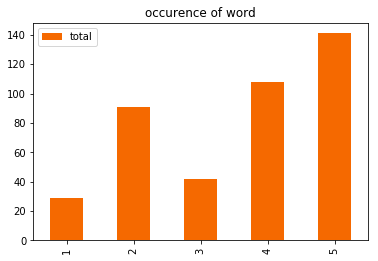

In [11]:
df_corpora = tagText.freq_stats_corpora(data_preprocessed.head())

# show result
df_corpora.sort_values(by='total', ascending=False)
df_corpora.plot(kind='bar', color="#f56900", title='occurence of word')
